# 01. Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy

# 02. Importing the dataframe

In [2]:
# Creating a path 
path= r'C:\Users\amore\Documents\Data Analyst course\Data Immersion\Achievement 4_python\Instacard_basket_analysis_29_01_2023'

In [3]:
# Importing dataframe
df_def=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_merged_update_2.pkl'))

# 03. Practice of Exercise 4.9: Intro to Data visualization with Python

<AxesSubplot:>

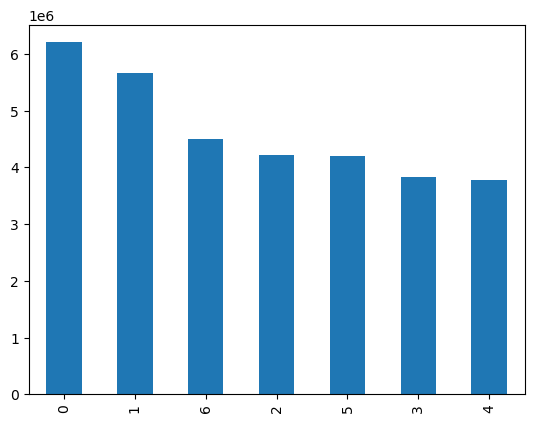

In [4]:
#creating a barchart of a variable
df_def['orders_day_of_week'].value_counts().plot.bar()

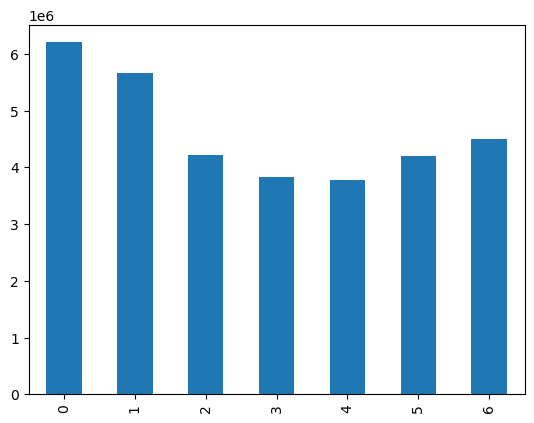

In [5]:
#sorting according to the index order
bar = df_def['orders_day_of_week'].value_counts().sort_index().plot.bar()

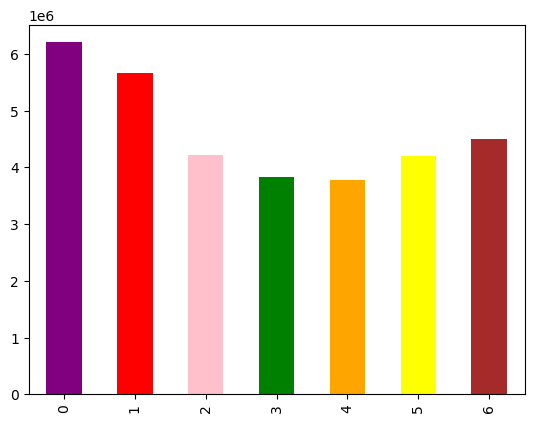

In [6]:
# color coding the barchart 
bar = df_def['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['purple','red','pink','green','orange', 'yellow','brown'])

In [7]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

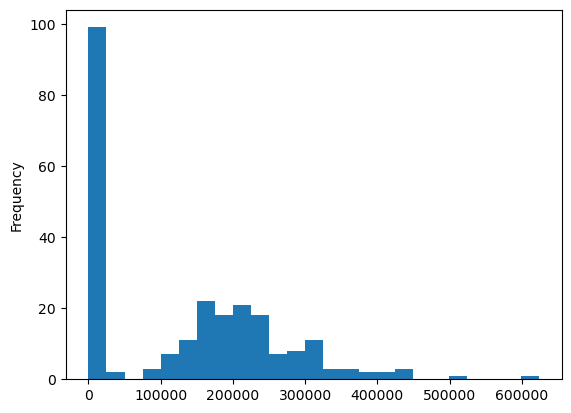

In [8]:
df_def['prices'].value_counts().plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

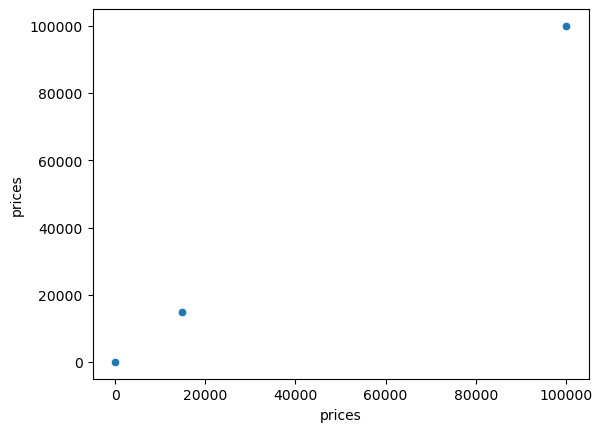

In [9]:
sns.scatterplot(x='prices', y='prices', data = df_def)

In [10]:
df_def.loc[df_def['prices']> 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,orders_day_of_week,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,order_frequency,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,prior,12,2,...,High-range product,Regularly busy,Regularly busy,most orders,40,Regular customer,108.648299,High Spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,prior,22,6,...,High-range product,Regularly busy,Regularly busy,average orders,40,Regular customer,108.648299,High Spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,prior,2,2,...,High-range product,Regularly busy,Regularly busy,average orders,4,New customer,1154.792308,High Spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,prior,3,0,...,High-range product,Busiest day,Busiest days,average orders,4,New customer,1154.792308,High Spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,prior,8,1,...,High-range product,Regularly busy,Busiest days,average orders,16,Regular customer,114.426619,High Spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,prior,29,0,...,High-range product,Busiest day,Busiest days,average orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,prior,31,0,...,High-range product,Busiest day,Busiest days,average orders,39,Regular customer,1106.743956,High Spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,prior,13,3,...,High-range product,Regularly busy,least busy days,most orders,15,Regular customer,451.153540,High Spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,prior,7,3,...,High-range product,Regularly busy,least busy days,average orders,12,Regular customer,1178.381871,High Spender,12.0,Regular customer


In [11]:
df_def.loc[df_def['prices']>100, 'prices']= np.nan

In [12]:
df_def['prices'].max()

25.0

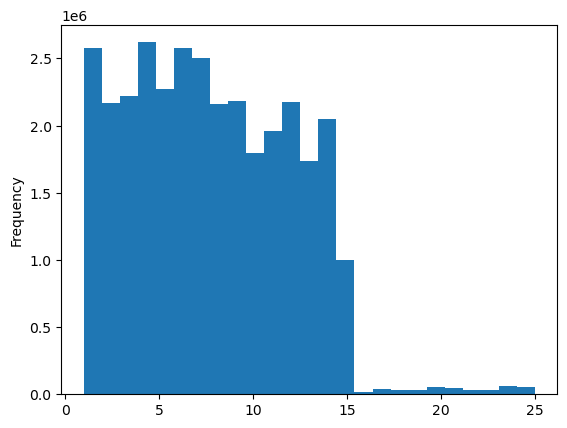

In [13]:
hist = df_def['prices'].plot.hist(bins = 25)

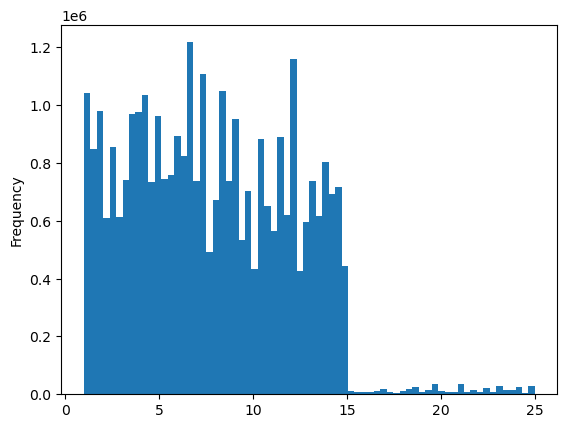

In [14]:
hist_2 = df_def['prices'].plot.hist(bins = 70)

In [15]:
df_def.shape

(32404859, 26)

In [16]:
np.random.seed(4)

In [17]:
dev = np.random.rand(len(df_def))<= 0.7

In [18]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [19]:
big = df_def[dev]

In [20]:
small = df_def[~dev]

In [21]:
big.shape

(22683761, 26)

In [22]:
small.shape

(9721098, 26)

In [23]:
len(big) + len(small)

32404859

In [24]:
df_def2 = small[['orders_day_of_week', 'prices']]

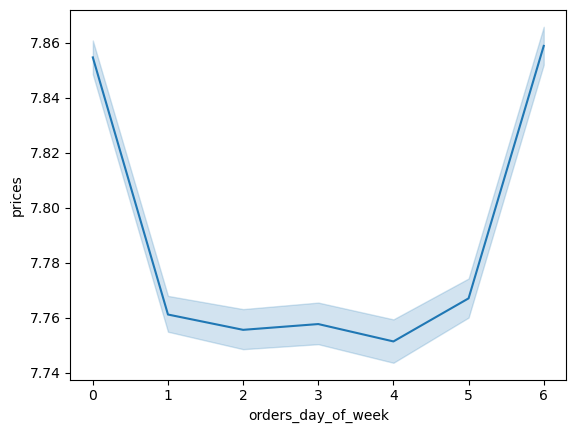

In [25]:
line = sns.lineplot(data = df_def2, x = 'orders_day_of_week', y = 'prices')

In [26]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','line_price_days_week.png'))

# 04. Exporting clean data

In [27]:
df_def.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged_update_2_clean.pkl'))